#  Simple Linear Regression Model

This is Python code for an example plot of a learning curve using Scikit-learn with a simple one-variable linear regression Pytorch model.  The skorch library is used to wrap the Pytorch model in a NeuralNetRegressor object.  This object can be passed directly to the scikit-learn LearningCurveDisplay.from_estimator function, taking advantage of [duck typing](https://en.wikipedia.org/wiki/Duck_typing) in Scikit-learn.

In [ ]:
!pip list

In [2]:
# Packages to install on Google Colab
!pip install --upgrade skorch scikit-learn # need scikit-learn v1.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np
from sklearn.model_selection import LearningCurveDisplay
from sklearn.metrics import mean_squared_error, make_scorer
import torch
import torch.nn as nn
from skorch import NeuralNetRegressor

In [4]:
# generate training data
np.random.seed(0)
N = 100 # number of data points
X = np.random.random(N)*10
X = X.reshape((-1,1))
y = 3*X + 1 + np.random.randn(N,1)
y = y.reshape((-1,1))

In [5]:
X = torch.from_numpy(X.astype(np.float32))
y = torch.from_numpy(y.astype(np.float32))

In [6]:
class LinearRegressionModule(nn.Module):
    def __init__(self, num_inputs=1):
        super().__init__()
        self.linear_regression = nn.Linear(num_inputs,1)

    def forward(self, X, **kwargs):
        X = self.linear_regression(X)
        return X

In [7]:
nnr = NeuralNetRegressor(
    module = LinearRegressionModule,
    lr=0.01,
    max_epochs=20,
    verbose=0, # do not print table when "fit" is called
    optimizer__momentum=.8
)

The learning curves below show both the training and testing error falling to a low value, even for relatively small training set sizes.  A high bias or high variance model seems unlikely, which is what we expect since the data is generated in accordance with a linear regression model.  Also, collecting (or generating in this case) more training data is unlikely to improve the model, since the lines seem likely to continue along the x-axis at low y-values.

Here, we are using 3-fold cross validation at each training set size.  Thus, the training set size cannot exceed 66, or 66% of the total data.

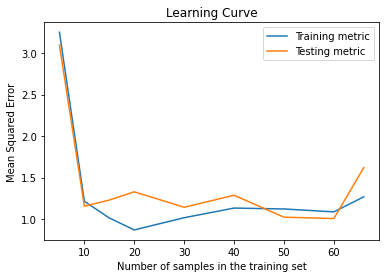

In [8]:
lcd = LearningCurveDisplay.from_estimator(
   nnr, X, y, score_type='both', score_name='Mean Squared Error', 
   scoring=make_scorer(mean_squared_error), std_display_style=None,
   exploit_incremental_learning=True, cv=3,
   train_sizes=np.concatenate((np.arange(5,20,5),
                               np.arange(20,70,10),np.array([66]))))
lcd.ax_.set_title('Learning Curve')
lcd.ax_.legend(loc='upper right');

In [9]:
lcd.ax_.get_figure().savefig('linear_regression.png')